In [114]:

import pandas as pd
titanic_data = pd.read_csv("titanic_train.csv")


In [115]:
# remove irrelevant colums

In [116]:
irrelevant_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']
titanic_data = titanic_data.drop(columns=irrelevant_columns)



In [117]:
titanic_data

,Survived,Pclass,Sex,Age,Age Group,SibSp,Parch,Fare
0,0,3,male,22.0,Youth,1,0,7.2500
1,1,1,female,38.0,Adult,1,0,71.2833
2,1,3,female,26.0,Adult,0,0,7.9250
3,1,1,female,35.0,Adult,1,0,53.1000
4,0,3,male,35.0,Adult,0,0,8.0500
...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,Adult,0,0,13.0000
885,1,1,female,19.0,Youth,0,0,30.0000
886,0,3,female,NaN,Baby,1,2,23.4500
887,1,1,male,26.0,Adult,0,0,30.0000


In [118]:
#Create new columns

In [119]:
# a. AgeGroup

In [120]:
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'],
                                  bins=[0, 2, 14, 24, 65, float('inf')],
                                  labels=['Baby', 'Child', 'Youth', 'Adult', 'Senior'],
                                  right=False,
                                  include_lowest=True)
titanic_data['AgeGroup'] = titanic_data['AgeGroup'].cat.add_categories('NK').fillna('NK')
# Drop the original 'Age' column
titanic_data = titanic_data.drop(columns=['Age'])

# Rest of the code remains the same



In [121]:
# b. Relatives 


In [122]:
titanic_data['Relatives'] = titanic_data['SibSp'] + titanic_data['Parch']
titanic_data['Relatives'] = pd.cut(titanic_data['Relatives'],
                                   bins=[-1, 0, 3, float('inf')],
                                   labels=['None', 'Few', 'Many'],
                                   right=False,
                                   include_lowest=True)

In [123]:
# c Faqre

In [124]:
titanic_data['FareCategory'] = pd.cut(titanic_data['Fare'],
                                      bins=[-1, 0, 50, 100, float('inf')],
                                      labels=['Free', 'Low', 'Average', 'High'],
                                      right=False,
                                      include_lowest=True)

In [125]:
# Step 4: Apply one-hot encoding
titanic_data

,Survived,Pclass,Sex,Age Group,SibSp,Parch,Fare,AgeGroup,Relatives,FareCategory
0,0,3,male,Youth,1,0,7.2500,Youth,Few,Low
1,1,1,female,Adult,1,0,71.2833,Adult,Few,Average
2,1,3,female,Adult,0,0,7.9250,Adult,Few,Low
3,1,1,female,Adult,1,0,53.1000,Adult,Few,Average
4,0,3,male,Adult,0,0,8.0500,Adult,Few,Low
...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,Adult,0,0,13.0000,Adult,Few,Low
885,1,1,female,Youth,0,0,30.0000,Youth,Few,Low
886,0,3,female,Baby,1,2,23.4500,NK,Many,Low
887,1,1,male,Adult,0,0,30.0000,Adult,Few,Low


In [126]:
# titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'AgeGroup', 'Relatives', 'FareCategory'], drop_first=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'AgeGroup', 'Relatives', 'FareCategory', ], drop_first=True)

# Step 4: Apply one-hot encoding

titanic_data = titanic_data.drop(columns=['Age Group'])
titanic_data


,Survived,Pclass,Age Group,SibSp,Parch,Fare,Sex_male,AgeGroup_Child,AgeGroup_Youth,AgeGroup_Adult,...,Relatives_Few,Relatives_Many,FareCategory_Low,FareCategory_Average,FareCategory_High,AgeGroup_Child,AgeGroup_Youth,AgeGroup_Adult,AgeGroup_Senior,AgeGroup_NK
0,0,3,Youth,1,0,7.2500,True,False,True,False,...,True,False,True,False,False,False,True,False,False,False
1,1,1,Adult,1,0,71.2833,False,False,False,True,...,True,False,False,True,False,False,False,True,False,False
2,1,3,Adult,0,0,7.9250,False,False,False,True,...,True,False,True,False,False,False,False,True,False,False
3,1,1,Adult,1,0,53.1000,False,False,False,True,...,True,False,False,True,False,False,False,True,False,False
4,0,3,Adult,0,0,8.0500,True,False,False,True,...,True,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,Adult,0,0,13.0000,True,False,False,True,...,True,False,True,False,False,False,False,True,False,False
885,1,1,Youth,0,0,30.0000,False,False,True,False,...,True,False,True,False,False,False,True,False,False,False
886,0,3,Baby,1,2,23.4500,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
887,1,1,Adult,0,0,30.0000,True,False,False,True,...,True,False,True,False,False,False,False,True,False,False


In [132]:
# Step 5: Split data into train and test set
titanic_data = titanic_data.drop(columns=['Age Group'])
titanic_data

,Survived,Pclass,SibSp,Parch,Fare,Sex_male,AgeGroup_Child,AgeGroup_Youth,AgeGroup_Adult,AgeGroup_Senior,...,Relatives_Few,Relatives_Many,FareCategory_Low,FareCategory_Average,FareCategory_High,AgeGroup_Child,AgeGroup_Youth,AgeGroup_Adult,AgeGroup_Senior,AgeGroup_NK
0,0,3,1,0,7.2500,True,False,True,False,False,...,True,False,True,False,False,False,True,False,False,False
1,1,1,1,0,71.2833,False,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
2,1,3,0,0,7.9250,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,1,1,1,0,53.1000,False,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
4,0,3,0,0,8.0500,True,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,0,0,13.0000,True,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
885,1,1,0,0,30.0000,False,False,True,False,False,...,True,False,True,False,False,False,True,False,False,False
886,0,3,1,2,23.4500,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
887,1,1,0,0,30.0000,True,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False


In [133]:
from sklearn.model_selection import train_test_split

X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
# Step 6: Fit model using Decision Trees
# Check data types of columns
titanic_data


,Survived,Pclass,SibSp,Parch,Fare,Sex_male,AgeGroup_Child,AgeGroup_Youth,AgeGroup_Adult,AgeGroup_Senior,...,Relatives_Few,Relatives_Many,FareCategory_Low,FareCategory_Average,FareCategory_High,AgeGroup_Child,AgeGroup_Youth,AgeGroup_Adult,AgeGroup_Senior,AgeGroup_NK
0,0,3,1,0,7.2500,True,False,True,False,False,...,True,False,True,False,False,False,True,False,False,False
1,1,1,1,0,71.2833,False,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
2,1,3,0,0,7.9250,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
3,1,1,1,0,53.1000,False,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
4,0,3,0,0,8.0500,True,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,0,0,13.0000,True,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False
885,1,1,0,0,30.0000,False,False,True,False,False,...,True,False,True,False,False,False,True,False,False,False
886,0,3,1,2,23.4500,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
887,1,1,0,0,30.0000,True,False,False,True,False,...,True,False,True,False,False,False,False,True,False,False


In [135]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [136]:
# Step 7: Predict survival for the test set
y_pred = model.predict(X_test)

In [137]:
# Step 8: Print accuracy and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7584269662921348
Confusion Matrix:
[[85 24]
 [19 50]]


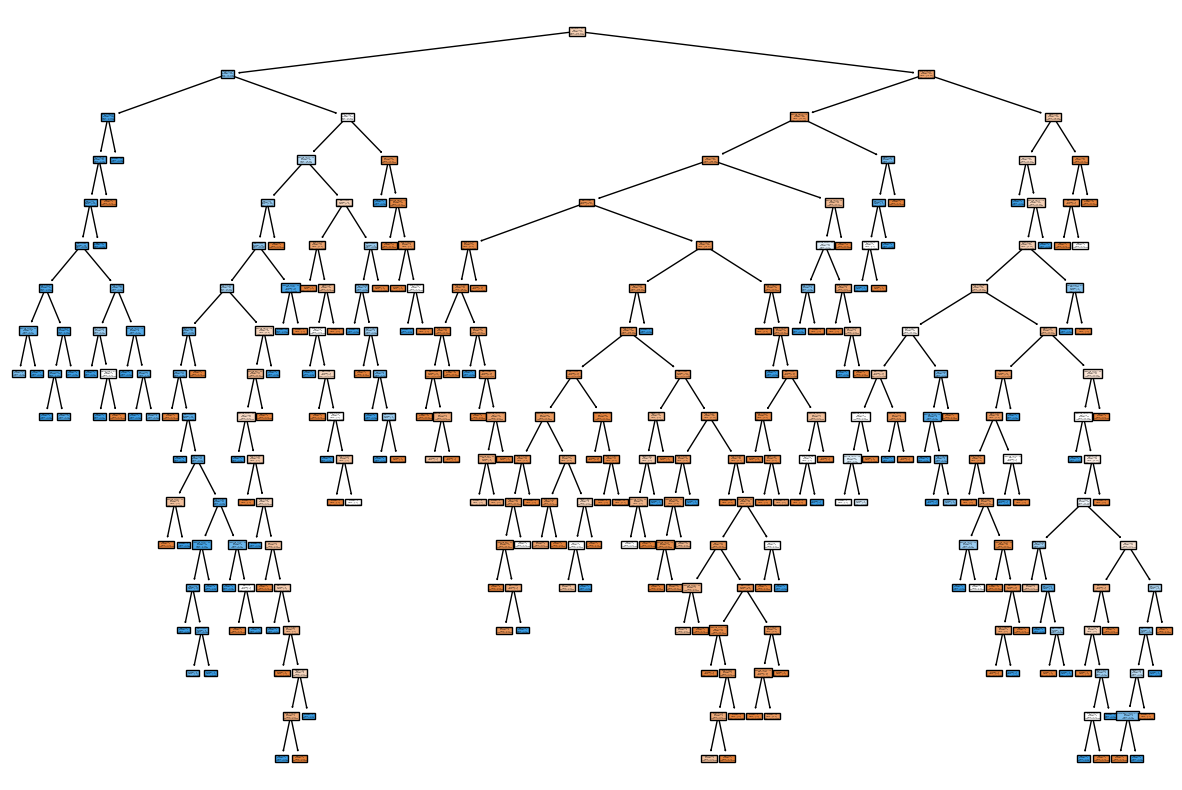

In [138]:
# Step 9: Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

In [139]:
# Step 10: Perform clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

c:\Users\calvi_zn\anaconda3\envs\aisd_env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\calvi_zn\anaconda3\envs\aisd_env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\calvi_zn\anaconda3\envs\aisd_env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\calvi_zn\anaconda3\envs\aisd_env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

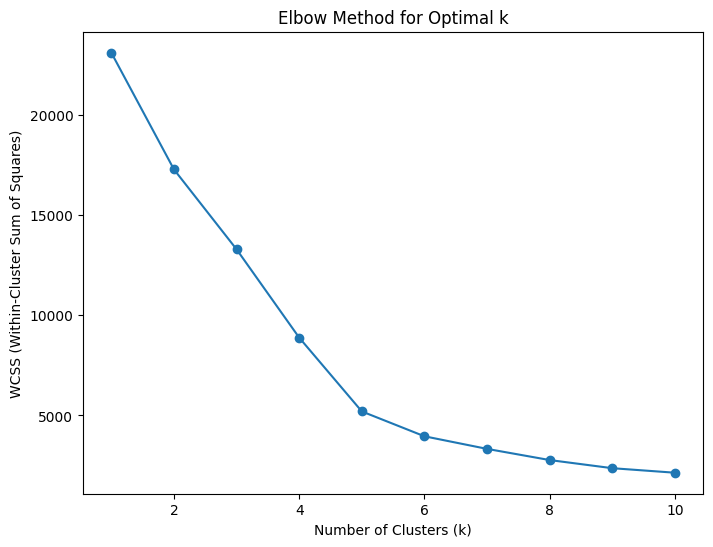

c:\Users\calvi_zn\anaconda3\envs\aisd_env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\calvi_zn\anaconda3\envs\aisd_env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\calvi_zn\anaconda3\envs\aisd_env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\calvi_zn\anaconda3\envs\aisd_env1\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

Best k value: 10


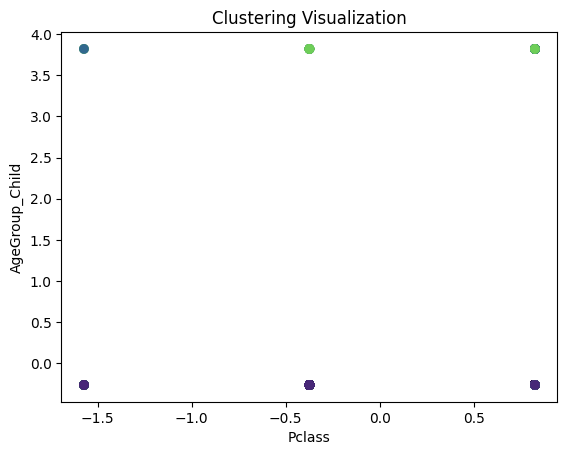

In [143]:
# Select relevant features for clustering
cluster_features = ['Pclass', 'AgeGroup_Child', 'AgeGroup_Youth', 'AgeGroup_Adult', 'AgeGroup_Senior',
       'AgeGroup_NK', 'Relatives_Few', 'Relatives_Many', 'FareCategory_Low',
       'FareCategory_Average', 'FareCategory_High', 'AgeGroup_Child',
       'AgeGroup_Youth', 'AgeGroup_Adult', 'AgeGroup_Senior', 'AgeGroup_NK']
X_cluster = titanic_data[cluster_features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Elbow method to find the best k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Choose the best k using the silhouette score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

best_k = np.argmax(silhouette_scores) + 2  # Adding 2 because the loop starts from 2 clusters
print(f'Best k value: {best_k}')

# Fit KMeans with the best k
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
titanic_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Optional: Visualize the clusters (2D plot)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=titanic_data['Cluster'], cmap='viridis')
plt.title('Clustering Visualization')
plt.xlabel(cluster_features[0])
plt.ylabel(cluster_features[1])
plt.show()

In [142]:
titanic_data.columns


Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'AgeGroup_Child', 'AgeGroup_Youth', 'AgeGroup_Adult', 'AgeGroup_Senior',
       'AgeGroup_NK', 'Relatives_Few', 'Relatives_Many', 'FareCategory_Low',
       'FareCategory_Average', 'FareCategory_High', 'AgeGroup_Child',
       'AgeGroup_Youth', 'AgeGroup_Adult', 'AgeGroup_Senior', 'AgeGroup_NK'],
      dtype='object')